# 입문자를 위한, 파이썬/R 데이터 분석   

## Part(1) - Day06  : 

]

## Today's mission

- 웹 데이터 수집 및  Beautiful Soup 리뷰
  - 웹 데이터 수집 개념
  - 웹 데이터 기본 구조
  - 웹 데이터 HTML 
  - Python 파이썬 관련 라이브러리 : Beautiful Soup
  
- 실습 (1) google news 검색

- 실습 (2) google news 검색 함수 작성

]

### 웹 데이터 수집 개념 :
 - 크롤링(crawling) 과 스크래핑(Scraping)
 - 웹 크롤러는 웹 페이지를 Chrome, IE 와 같은 브라우저로 접속하지 않고, Python 파이썬같은 프로그래밍 언어로 접속하여, 필요한 내용만 가져옴


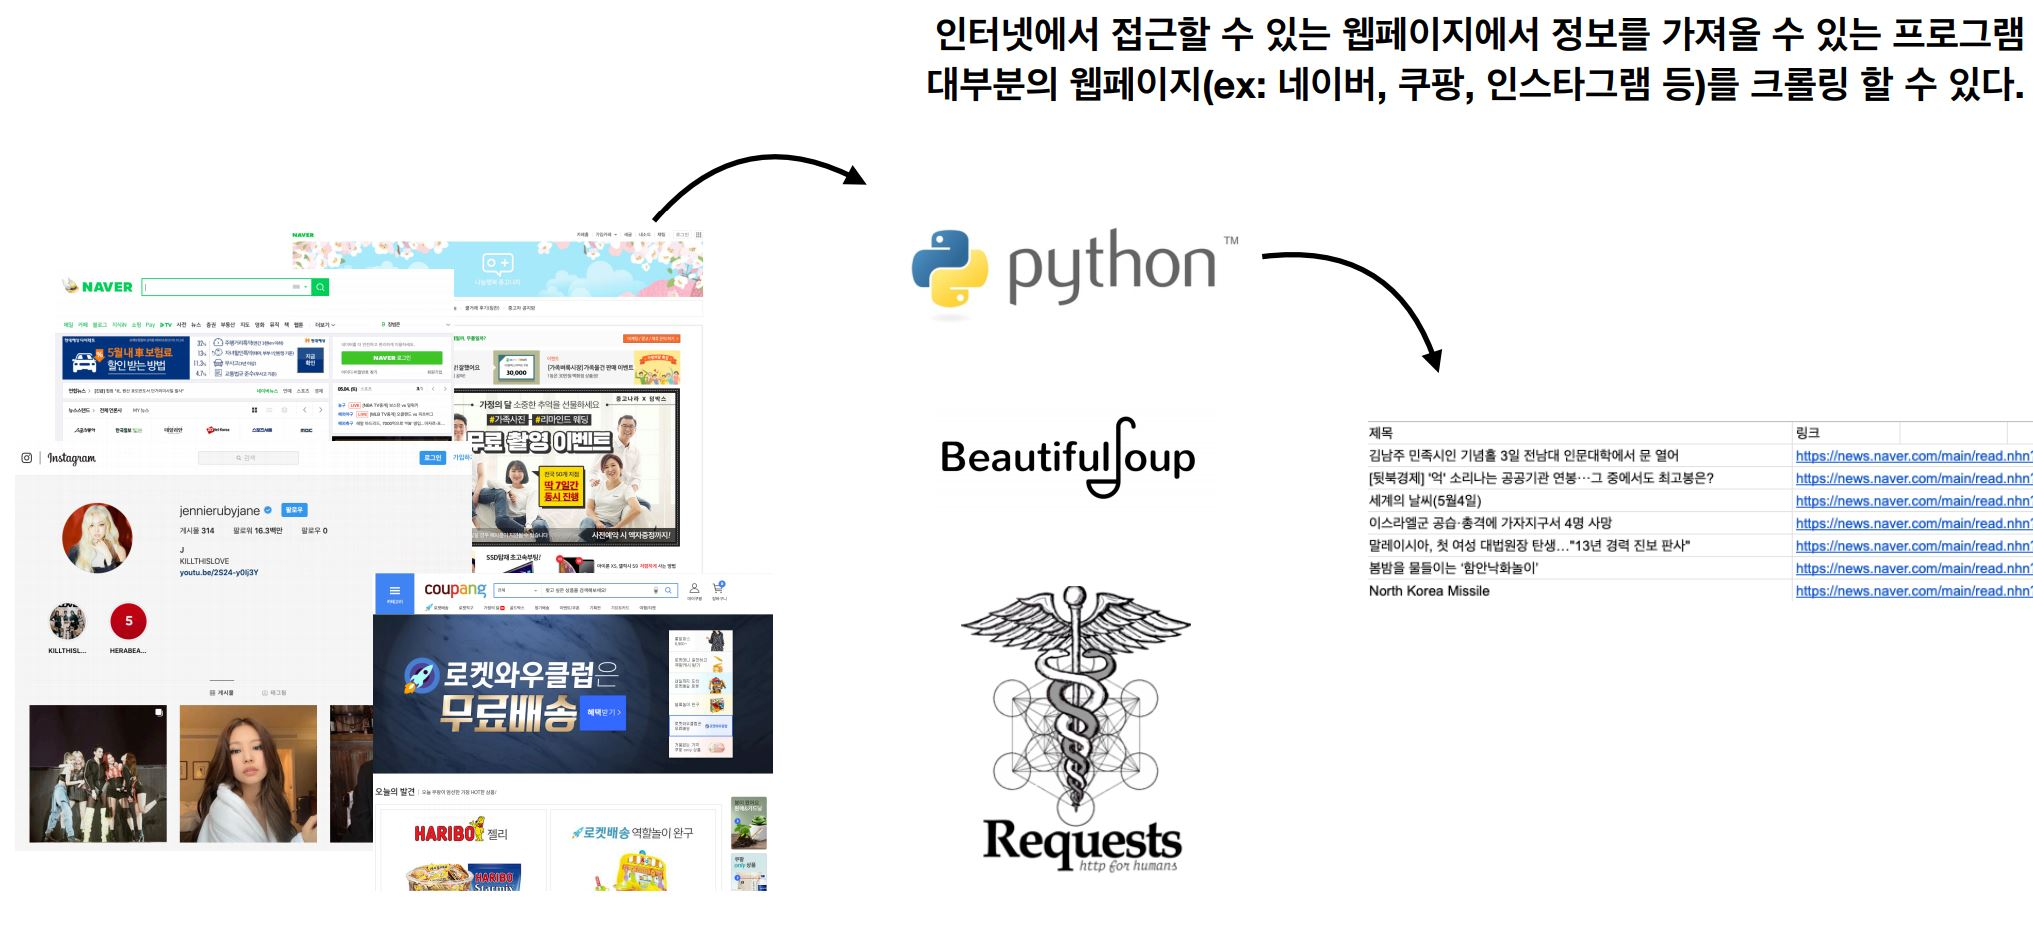

### 웹 데이터 기본 구조 :
 - CSS + HTML + Java 

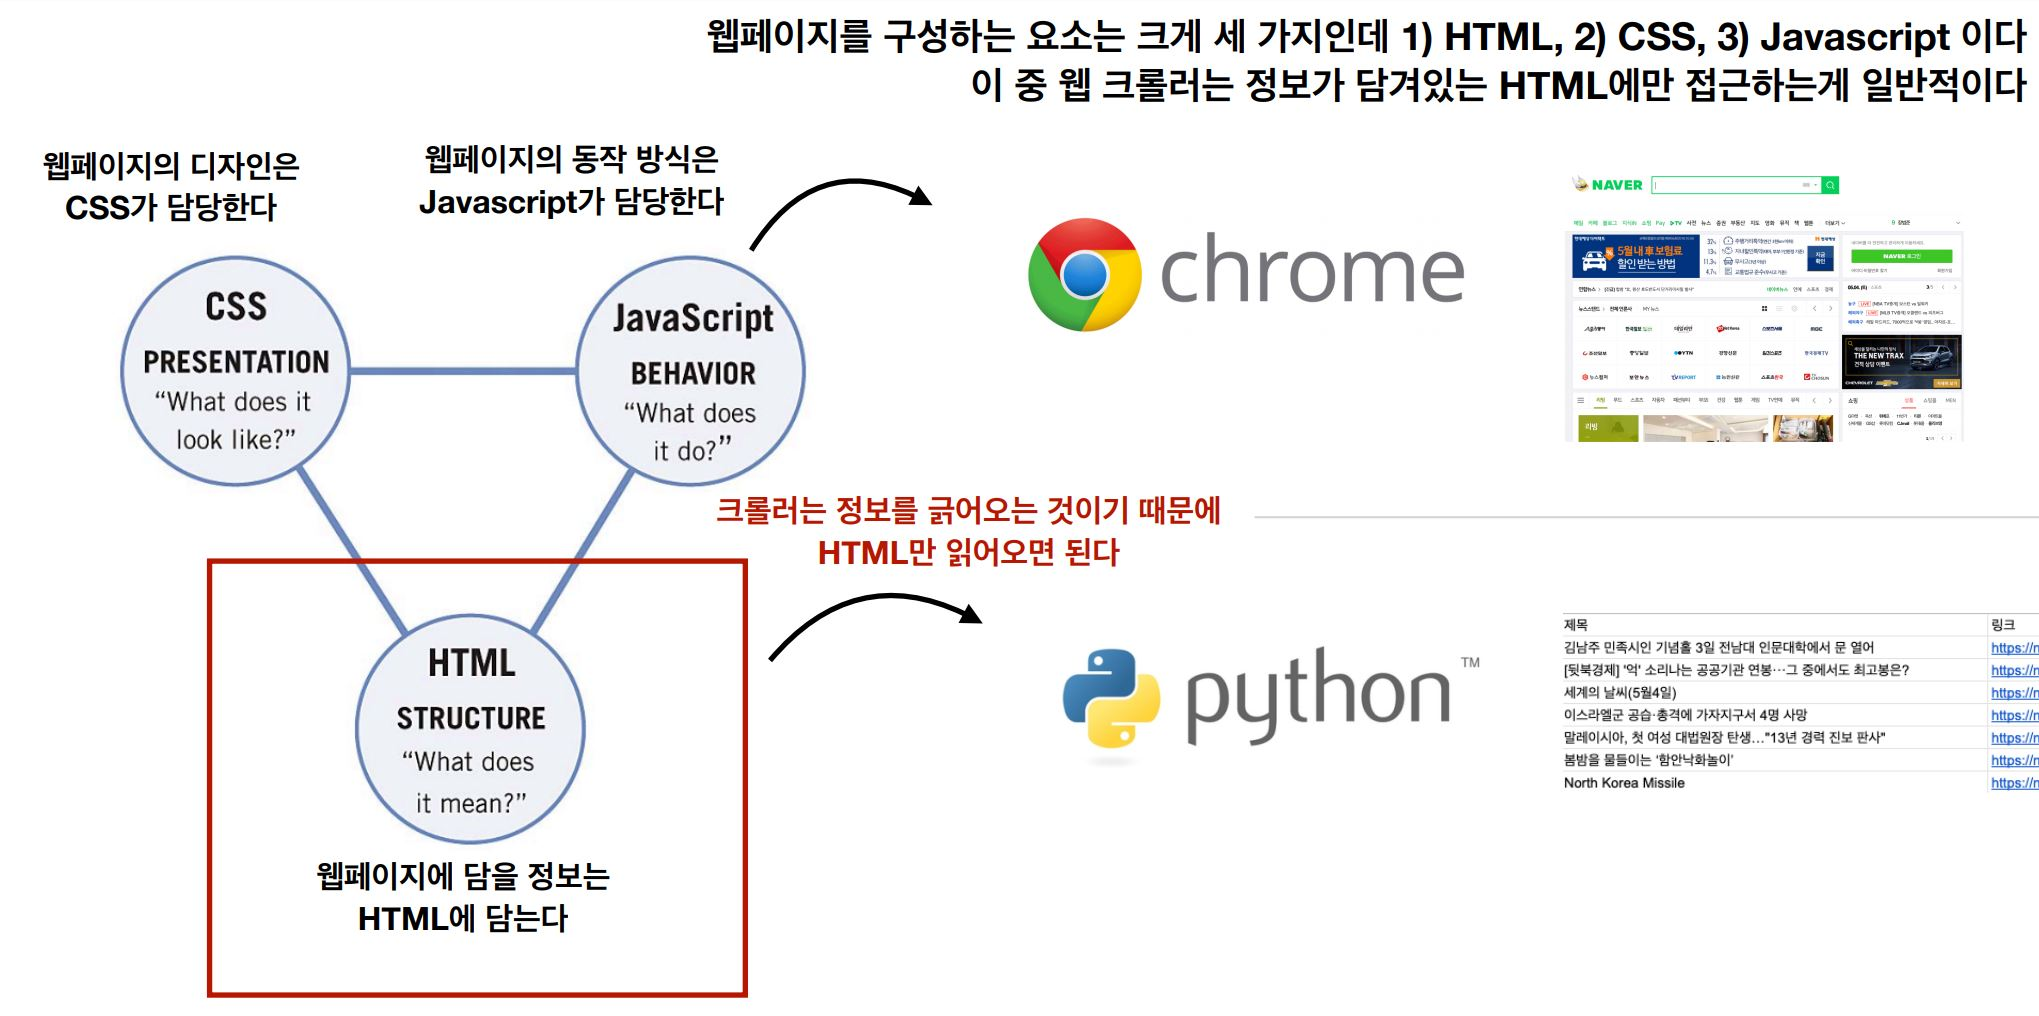

### 웹 데이터 HTML :
 - HTML코드는 웹페이지를 제공하는 사람(웹사이트 운영자)과 이를 이용하는 사람(ex: 검색엔진, 브라우저)간의 규약
 - 규약은 규약일 뿐, 너무 복잡하게 생각할 필요는 없음


##### 주요 HTML 태그

- h3 - 제목 (header)
- p - 단락 (paragraph)
- span - 개행 안 하는 단락
- div - 구역(divison)
- dl - 설명 리스트 (description list)
- dt - 설명 헤더 (description header)
- dd - 설명 내용
- img - 이미지(image)
- a - 링크(anchor)

### Python 파이썬 관련 라이브러리 : Beautiful Soup
 - 1) 뷰티플숩은 Crawling, Scraping 등을 위해 설계된 파이썬 패키지/라이브러리 
 
 --  (스크린 스크래핑의 대표적인 예로서, 웹 화면에서 데이터를 가져오는 웹 크롤링이라 이해하면 됨)

##### 주요 특징

- 1) HTML 구문 분석, 트리 탐색, 검색 및 수정을 위한 간단한 방법과 파이썬 기능을 활용하여 데이터 수집 프로그램 작성이 쉬움
- 2) 대부분의 문서 Encoding 자동 변환 (Unicode <-> UTF-8)   
--   ex) unicode (세계문자 표준 기준코드, 16bit), UTF-8 (3bytes/1자), euc-kr (한글 2bytes/1자)
- 3) lxml, html5lib 등 기능적 라이브러리를 사용하면, 속도 및 호환성 높은 응용프로그램 제작이 가능

##### 참고 site :
- https://www.crummy.com/software/BeautifulSoup/
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### 실습 (1) google news 검색
 - 참고사항 : robots.txt 
   https://searchadvisor.naver.com/guide/seo-basic-robots

- 구글 뉴스(http://news.google.com/) 

In [ ]:
# 패키지 import
import requests
from bs4 import BeautifulSoup

#### google news 검색 참고:

https://news.google.com/search?q=%EC%BD%94%EB%A1%9C%EB%82%98&hl=ko&gl=KR&ceid=KR%3Ako

 -> "https://news.google.com" + "/search?q=%EC%BD%94%EB%A1%9C%EB%82%98&hl=ko&gl=KR&ceid=KR%3Ako" (검색어: 코로나)


In [ ]:
# HTML 파일 읽어들이기
base_url = "https://news.google.com"

In [ ]:
search_url = "/search?q=%EC%BD%94%EB%A1%9C%EB%82%98&hl=ko&gl=KR&ceid=KR%3Ako"
url = base_url + search_url

In [ ]:
url

In [ ]:
# 검색정보 url GET 방식으로 요청
response = requests.get(url)
response                     # 200 : 응답코드 200 은 서버의 응답이 정상,   404 : url 이 잘못되거나 오류

In [ ]:
# HTML parser 이용해 soup 객체 생성
soup = BeautifulSoup(response.content, 'html.parser')
soup

In [ ]:
# 내부HTML 전체 구조파악 :
## Type1: soup.find_all('div', class_='xrnccd')[0]
## Type2: soup.select('div.xrnccd')[0]

In [ ]:
news_items = soup.select('div.xrnccd')

In [ ]:
print(len(news_items))

In [ ]:
print(news_items[0])

In [ ]:
# 내부HTML 각 내용 구조파악 :
## link
news_items[1].find('a', attrs={'class':'VDXfz'})
news_items[1].find('a', attrs={'class':'VDXfz'}).get('href')

In [ ]:
## news_items 에서 각 뉴스의 링크, 제목, 내용, 출처, 등록일시 등 추출:
## title
news_items[0].find('a', attrs={'class':'DY5T1d'}).text

In [ ]:
## content
news_items[0].find('h3', attrs={'class':'ipQwMb ekueJc RD0gLb'}).text

In [ ]:
## register
news_items[0].find('a', attrs={'class':'wEwyrc'}).text

In [ ]:
## time
news_items[0].find('time', attrs={'class':'WW6dff uQIVzc Sksgp slhocf'}).text

In [ ]:
## datetime
#news_items[0].find('time', attrs={'class':'WW6dff uQIVzc Sksgp'})
#news_items[0].find('time', attrs={'class':'WW6dff uQIVzc Sksgp'}).get('datetime')
#news_items[0].find('time', attrs={'class':'WW6dff uQIVzc Sksgp'}).get('datetime').split('T')

### 실습 (2) google news 검색 함수 작성

 - 실습(1) 활용하여 검색어 직접 입력하여 구글 뉴스 스크래핑 작성

In [ ]:
# 패키지 import
import requests
from bs4 import BeautifulSoup
import urllib

In [ ]:
# 검색어 요청 :
input_word = input('검색어 입력 : ')

In [ ]:
input_word

- (cf) urllib.parse.quote()는 아스키코드 형식이 아닌 글자를 URL 인코딩 시켜줍니다

(참고) URL 변환기 : https://www.convertstring.com/ko/EncodeDecode/UrlEncode

In [ ]:
## Google news 검색어 URL 코드로 encoding:
urllib.parse.quote(input_word)

In [ ]:
# 검색어 정보 URL 구성:
base_url = "https://news.google.com"
keyword = urllib.parse.quote(input_word)
search_url = "/search?q=" + keyword + "&hl=ko&gl=KR&ceid=KR%3Ako"  # keyword: %EC%BD%94%EB%A1%9C%EB%82%98
url = base_url + search_url
print(url)

#### def 함수화 시켜봅시다.

In [ ]:
def google_news_clipping_keyword(keyword_input):
    base_url = "https://news.google.com"
    keyword = urllib.parse.quote(keyword_input)
    search_url = "/search?q=" + keyword + "&hl=ko&gl=KR&ceid=KR%3Ako"  # keyword: %EC%BD%94%EB%A1%9C%EB%82%98
    url = base_url + search_url
    
    return url

In [ ]:
# 함수를 실행하여 뉴스 목록 정리
search_word = input("검색어를 입력하세요: ")

In [ ]:
news = google_news_clipping_keyword(search_word)

In [ ]:
print(news)